In [1]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from metal.models.pre_trained_weights.vggloader import prepare
from metal.models.vgg import vgg16_function, VGG16
from metal.core import get_top_classes
from time import time
import requests
from PIL import Image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.image.AxesImage at 0x7fb35c03da50>, dtype('float32'))

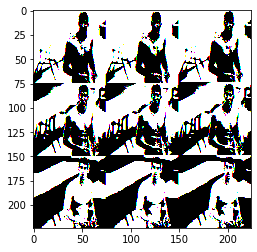

In [14]:
image_object = Image.open("am.jpg")
img = prepare(image_object)
plt.imshow(img.reshape(224,224,3)),img.dtype

In [8]:
vgg16 = VGG16()

In [12]:
out = vgg16_function(img.reshape(1,3,224,224),vgg16)
out_= get_top_classes(out,vgg16.labels,4)

In [13]:
out_

{'swimming trunks, bathing trunks': 153.1814,
 'maillot': 171.22302,
 'maillot, tank suit': 147.75056,
 'bathing cap, swimming cap': 145.93219}

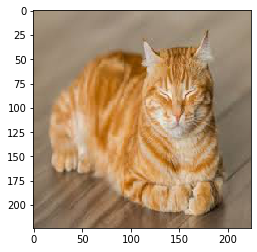

In [2]:
img = image.load_img("act1.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

LABELS_URL = 'https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'
response = requests.get(LABELS_URL)  # Make an HTTP GET request and store the response.
labels = {int(key): value for key, value in response.json().items()}

In [3]:
vgg16 = VGG16()


In [4]:
xx=prepare(img.reshape(224,224,3).astype("float32"),size=(224,224))

s=time()
o= vgg16_function(xx.reshape(1,3,224,224),vgg16)
e=time()
e-s

0.5883548259735107

In [7]:
get_top_classes(o,labels,4)

{'lynx, catamount': 113.60992,
 'tiger cat': 156.58385,
 'pineapple, ananas': 101.27142,
 'plastic bag': 100.70052}

In [8]:
#vgg16.vgg_layers